<a href="https://colab.research.google.com/github/jensi-1/-Dynamic-Multi-Modal-Sports-Analytics-Platform/blob/main/football_voronoi_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import os

video_path = "/content/(672) FULL MATCH _ Manchester United v Liverpool _ Quarter-final _ Emirates FA Cup 2023-24 - YouTube - Google Chrome 2025-02-22 11-14-07.mp4"  # Update this
frame_folder = "frames"

# Create folder if not exists
os.makedirs(frame_folder, exist_ok=True)

# Open video
cap = cv2.VideoCapture(video_path)
frame_count = 0
success, frame = cap.read()

while success:
    frame_path = os.path.join(frame_folder, f"frame_{frame_count}.jpg")
    cv2.imwrite(frame_path, frame)  # Save frame
    frame_count += 1
    success, frame = cap.read()  # Read next frame

cap.release()
print(f"✅ Extracted {frame_count} frames to '{frame_folder}'")


✅ Extracted 2855 frames to 'frames'


In [15]:
import os

frame_folder = "frames"

# Sort numerically instead of lexicographically
frame_files = sorted(os.listdir(frame_folder), key=lambda x: int(x.split("_")[1].split(".")[0]))[:5]

print("First 5 frames (correctly sorted):", frame_files)


First 5 frames (correctly sorted): ['frame_0.jpg', 'frame_1.jpg', 'frame_2.jpg', 'frame_3.jpg', 'frame_4.jpg']


In [16]:
import cv2
import os
import matplotlib.pyplot as plt

frame_folder = "frames"

# Get first frame path
frame_files = sorted(os.listdir(frame_folder), key=lambda x: int(x.split("_")[1].split(".")[0]))
frame_path = os.path.join(frame_folder, frame_files[0])  # First frame

# Read image
frame = cv2.imread(frame_path)

# Check if the frame is loaded
if frame is None:
    print("Error: Frame not loaded!")
else:
    # Convert BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display image
    plt.imshow(frame)
    plt.axis("off")  # Hide axes
    plt.show()


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2
import matplotlib.pyplot as plt

frame = cv2.imread("/content/frames/frame_0.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)
plt.axis("off")
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-22 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


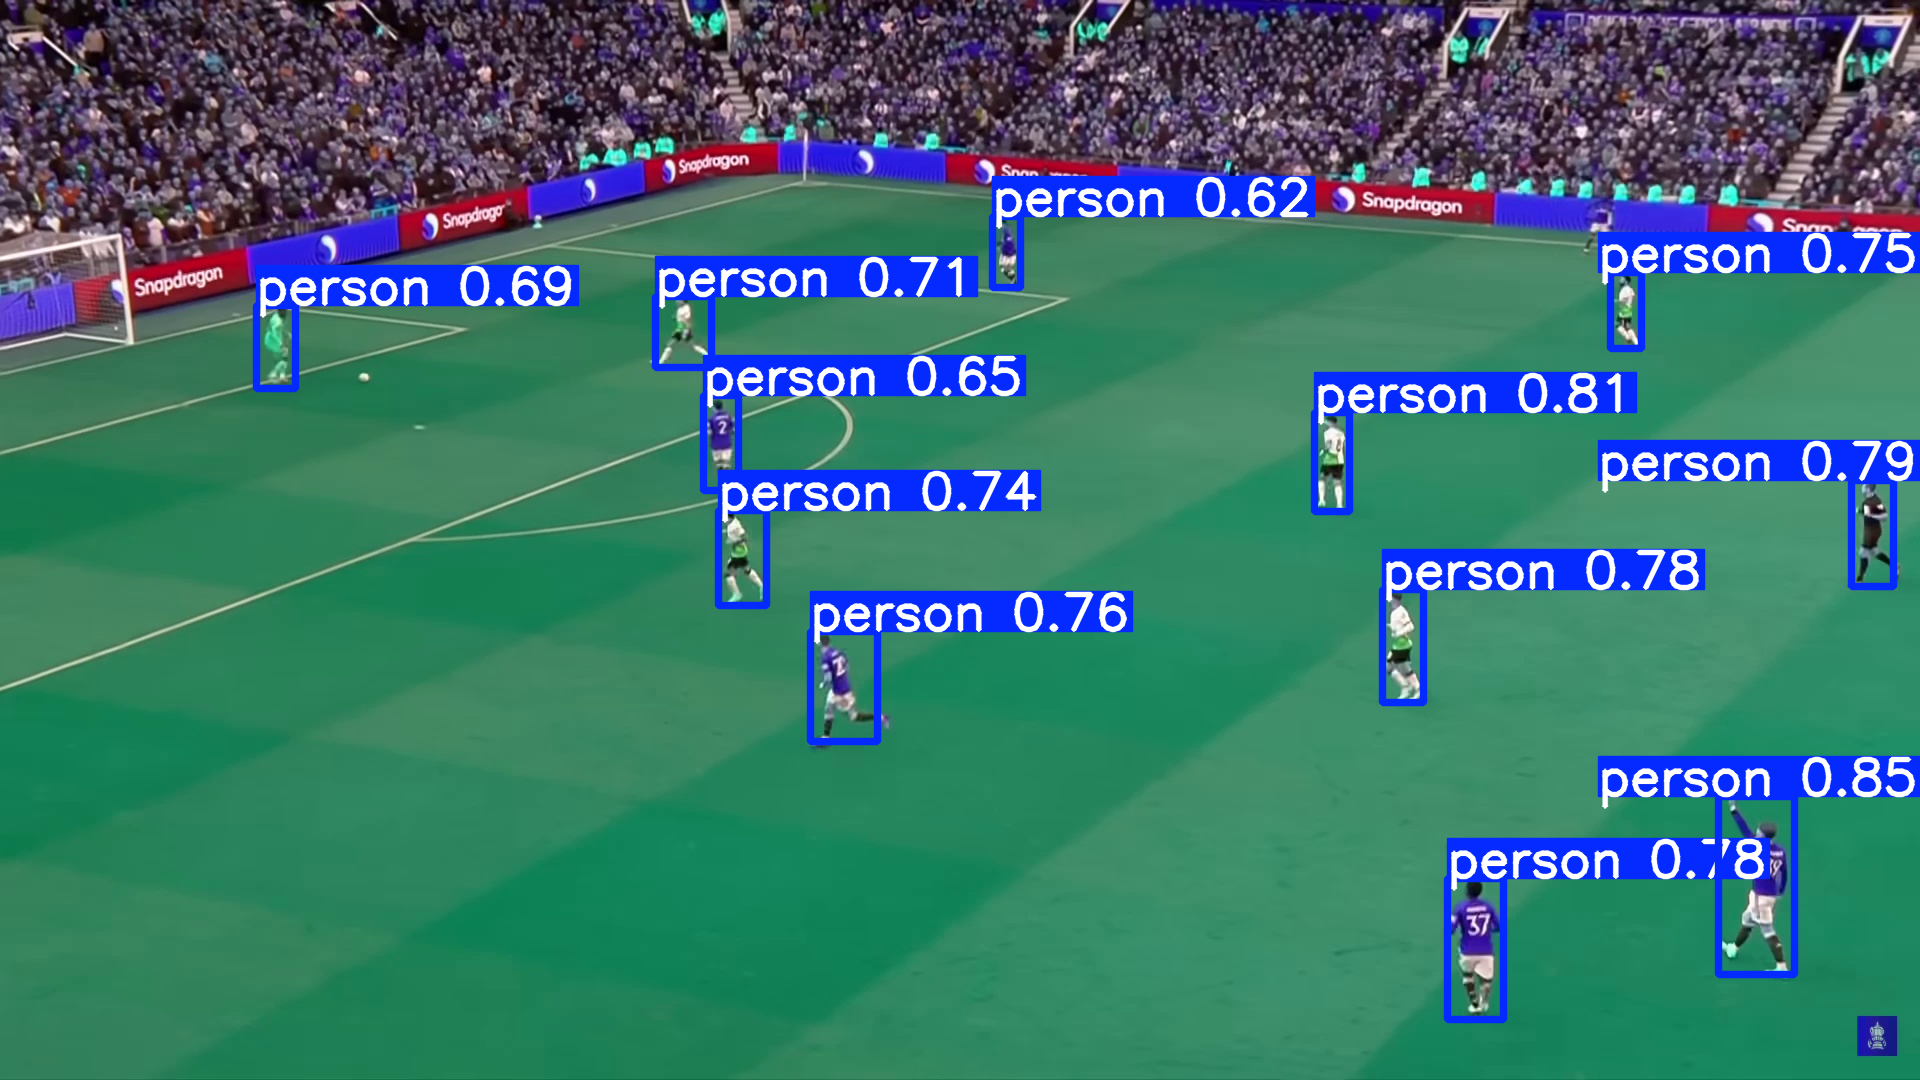

In [19]:
import torch
import cv2

model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # Load YOLOv5 small model

frame = cv2.imread("/content/frames/frame_0.jpg")

   # Check if the frame is loaded
if frame is None:
       print("Error: Frame not loaded! Check file path.")
else:
       results = model(frame)  # Run YOLO on a sample frame
       results.show()  # Show the detections

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Example Player Coordinates
players = np.array([[100, 200], [400, 250], [500, 500], [700, 100]])

# Compute Voronoi Diagram
vor = Voronoi(players)

# Plot Voronoi on Image
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
plt.show()


In [23]:
import cv2
import numpy as np
import os
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load YOLO model
from ultralytics import YOLO
model = YOLO("yolov5s.pt")  # Pre-trained YOLOv5 model

def draw_voronoi(frame, players):
    """Draws the Voronoi diagram on the frame."""
    if len(players) < 4:  # Need at least 4 points for Voronoi in 2D
        return frame  # Return original frame if not enough players

    vor = Voronoi(players)

    # Create a copy of the frame to draw on
    frame_voronoi = frame.copy()

    # Draw Voronoi regions (you can customize colors, line thickness, etc.)
    for region in vor.regions:
        if not -1 in region and len(region) > 0:
            polygon = [vor.vertices[i] for i in region]
            polygon = np.array(polygon, np.int32)
            cv2.polylines(frame_voronoi, [polygon], True, (0, 255, 0), 2)

    return frame_voronoi

# Create output folder if not exists
output_folder = "processed_frames"  # You might want to change this
os.makedirs(output_folder, exist_ok=True)

# Process Frames
frame_folder = "frames"  # Make sure this is correct
frame_files = sorted(os.listdir(frame_folder))
for frame_file in frame_files:
    frame_path = os.path.join(frame_folder, frame_file)
    frame = cv2.imread(frame_path)

    if frame is None:
        continue

    # YOLO object detection
    results = model(frame)  # Run YOLO on frame

    players = []

    for det in results[0].boxes:  # Extract bounding boxes correctly
        x1, y1, x2, y2 = det.xyxy[0].cpu().numpy()  # Extract box coordinates
        cls = int(det.cls[0].cpu().numpy())  # Extract class ID

        if cls == 0:  # Class 0 = 'person' in COCO dataset
            cx, cy = int((x1 + x2) / 2), int((y1 + y2) / 2)
            players.append((cx, cy))

    # Draw Voronoi
    frame_voronoi = draw_voronoi(frame, players)

    # Save processed frame
    output_path = os.path.join(output_folder, frame_file)
    cv2.imwrite(output_path, frame_voronoi)

print("✅ Voronoi overlay completed on all frames!")

Streaming output truncated to the last 5000 lines.
Speed: 4.5ms preprocess, 338.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 358.7ms
Speed: 4.6ms preprocess, 358.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 347.8ms
Speed: 4.6ms preprocess, 347.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 sports ball, 356.5ms
Speed: 4.7ms preprocess, 356.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 336.6ms
Speed: 4.6ms preprocess, 336.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 344.7ms
Speed: 4.6ms preprocess, 344.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 357.7ms
Speed: 4.6ms preprocess, 357.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 333.1ms
Speed: 4.7ms preprocess,

In [24]:
import cv2
import os

frame_folder = "processed_frames"  # Folder containing processed frames
output_video = "output.mp4"  # Final video file
fps = 30  # Adjust based on original video

# Get frame list and sort numerically
frames = sorted([f for f in os.listdir(frame_folder) if f.endswith(".jpg")], key=lambda x: int(x.split("_")[1].split(".")[0]))

# Read the first frame to get dimensions
first_frame = cv2.imread(os.path.join(frame_folder, frames[0]))
height, width, _ = first_frame.shape

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec
video_writer = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Write frames to video
for frame in frames:
    img = cv2.imread(os.path.join(frame_folder, frame))
    video_writer.write(img)

video_writer.release()
cv2.destroyAllWindows()

print("✅ Video saved as:", output_video)


✅ Video saved as: output.mp4


In [25]:
import cv2

video_path = "output.mp4"
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"FPS: {fps}, Resolution: {width}x{height}")

cap.release()



FPS: 30.0, Resolution: 1920x1080


In [ ]:
import cv2

cap = cv2.VideoCapture("output.mp4")
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("heatmap_output.mp4", fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    heatmap = cv2.applyColorMap(frame, cv2.COLORMAP_JET)
    out.write(heatmap)

cap.release()
out.release()
cv2.destroyAllWindows()



In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [26]:
from google.colab import files

uploaded = files.upload()  # Manually upload your file


Saving output (1).mp4 to output (1).mp4


In [37]:
!mv "/content/output.mp4" "/content/yolov5/voronoi_output.mp4"


In [31]:
!ls /content/


'(672) FULL MATCH _ Manchester United v Liverpool _ Quarter-final _ Emirates FA Cup 2023-24 - YouTube - Google Chrome 2025-02-22 11-14-07.mp4'
 drive
 frames
'output (1).mp4'
 output.mp4
 processed_frames
 sample_data
 yolov5s.pt
 yolov5su.pt


In [32]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.


In [39]:
%cd /content/yolov5


/content/yolov5


In [40]:
!python detect.py --source voronoi_output.mp4 --weights yolov5s.pt --conf 0.4 --save-txt --save-conf --save-crop


detect: weights=['yolov5s.pt'], source=voronoi_output.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 140MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/2855) /content/yolov5/voronoi_output.mp4: 384x640 12 persons, 362.8ms
video 1/1 (2/2855) /content/yolov5/voronoi_output.mp4: 384x640 12 persons, 319.6ms
video 1/1 (3/2855) /content/yolov5/voronoi_output.mp4: 384x640 12 persons, 278.6ms
video 1/1 (4/2855) /content/yolov5/voronoi_output.mp4: 384x640 12 perso

In [43]:
from IPython.display import display, HTML

video_path = "runs/detect/exp/voronoi_output.mp4"  # Update path if different
display(HTML(f'<video width="800" controls><source src="{video_path}" type="video/mp4"></video>'))


In [44]:
from google.colab import files
files.download("runs/detect/exp/voronoi_output.mp4")  # Update with correct path if needed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import os
import pandas as pd

# Path where YOLO detections are saved
detections_path = "runs/detect/exp/labels/"

# Read all detection files
data = []
for file in os.listdir(detections_path):
    # Extract frame ID by splitting the filename and taking the last part
    frame_id = int(file.split('_')[-1].replace(".txt", ""))  # Split by '_' and take the last element
    with open(os.path.join(detections_path, file), "r") as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id, x, y, w, h, conf = map(float, values)  # YOLO format
            data.append([frame_id, class_id, x, y, conf])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Frame", "ClassID", "X", "Y", "Confidence"])
df.to_csv("player_positions.csv", index=False)
print("Saved player positions to player_positions.csv")

Saved player positions to player_positions.csv
